In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNIST 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리: 픽셀 값을 [0, 1] 범위로 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images), -1))
test_images = test_images.reshape((len(test_images), -1))


11490434/11490434 [==============================] - 2s 0us/step


In [2]:
# 오토인코더 모델 정의
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# 모델 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=50, batch_size=256, shuffle=True, validation_data=(test_images, test_images))


Epoch 1/50
235/235 [==============================] - 5s 15ms/step - loss: 0.2493 - val_loss: 0.1720
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1549 - val_loss: 0.1397
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1336 - val_loss: 0.1258
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1231 - val_loss: 0.1188
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1174 - val_loss: 0.1137
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1132 - val_loss: 0.1101
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1099 - val_loss: 0.1073
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1070 - val_loss: 0.1046
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1047 - val_loss: 0.1029
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1030 - val_los

1875/1875 [==============================] - 4s 2ms/step


c:\Users\wkwhs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


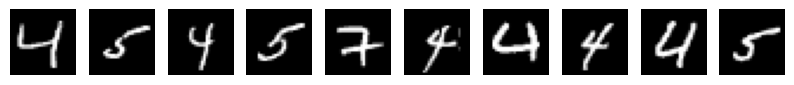

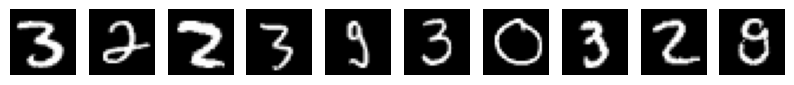

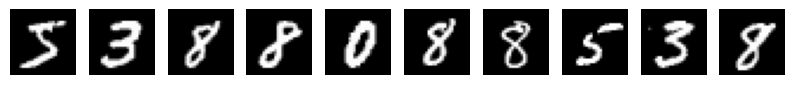

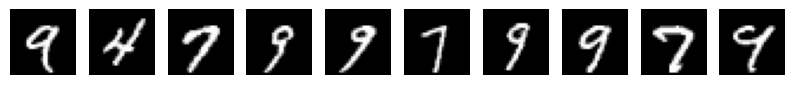

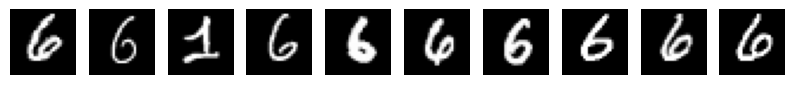

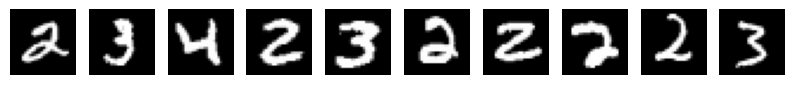

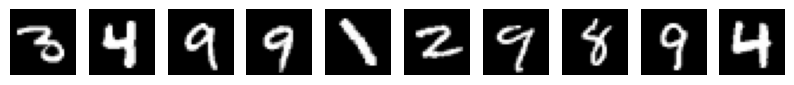

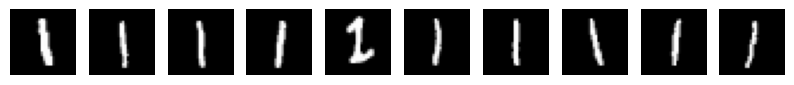

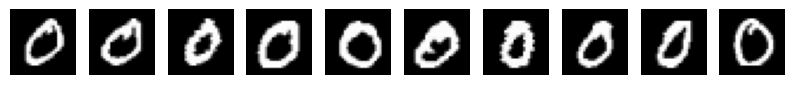

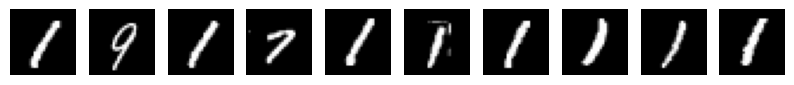

Cluster 0 - Dominant Label: 4, Label Distribution: {0: 642, 1: 51, 2: 884, 3: 279, 4: 2623, 5: 1066, 6: 718, 7: 719, 8: 562, 9: 567}
Cluster 1 - Dominant Label: 3, Label Distribution: {0: 362, 1: 12, 2: 436, 3: 2861, 4: 15, 5: 1555, 6: 41, 7: 4, 8: 579, 9: 51}
Cluster 2 - Dominant Label: 8, Label Distribution: {0: 221, 1: 95, 2: 432, 3: 1121, 4: 15, 5: 1832, 6: 114, 7: 26, 8: 3017, 9: 61}
Cluster 3 - Dominant Label: 7, Label Distribution: {0: 1, 1: 4, 2: 40, 3: 28, 4: 821, 5: 87, 7: 3884, 8: 62, 9: 2279}
Cluster 4 - Dominant Label: 6, Label Distribution: {0: 147, 1: 22, 2: 833, 3: 45, 4: 206, 5: 129, 6: 4364, 7: 2, 8: 46, 9: 17}
Cluster 5 - Dominant Label: 2, Label Distribution: {0: 241, 1: 27, 2: 2554, 3: 1311, 4: 55, 5: 232, 6: 189, 7: 21, 8: 794, 9: 102}
Cluster 6 - Dominant Label: 9, Label Distribution: {0: 53, 1: 18, 2: 145, 3: 204, 4: 1912, 5: 112, 6: 92, 7: 1400, 8: 311, 9: 2674}
Cluster 7 - Dominant Label: 1, Label Distribution: {1: 3844, 2: 60, 3: 35, 4: 11, 5: 9, 6: 40, 7: 58

In [3]:
# 잠재 벡터 추출
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(train_images)

# K-Means 군집화
kmeans = KMeans(n_clusters=10)  # MNIST는 0부터 9까지의 숫자로 이루어져 있으므로 10개의 군집을 설정
kmeans.fit(encoded_images)
cluster_centers = kmeans.cluster_centers_

# t-SNE 시각화
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(encoded_images)

# 군집별 이미지 출력
for i in range(10):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_images = train_images[cluster_indices].reshape(-1, 28, 28)
    plt.figure(figsize=(10, 2))
    for j in range(10):
        plt.subplot(1, 10, j+1)
        plt.imshow(cluster_images[j], cmap='gray')
        plt.axis('off')
    plt.show()

# 라벨 관계 출력 (MNIST 데이터셋에 라벨이 있음)
for i in range(10):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels = train_labels[cluster_indices]
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
    print(f"Cluster {i} - Dominant Label: {unique_labels[np.argmax(label_counts)]}, Label Distribution: {dict(zip(unique_labels, label_counts))}")
